In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
pip install ipython-autotime

In [ ]:
%load_ext autotime

time: 91.7 µs (started: 2022-03-05 15:50:35 +00:00)


In [ ]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import cv2
import shutil
import pickle
import datetime
import scipy as sp
from scipy import linalg
from skimage import img_as_ubyte
from xml.etree import cElementTree as ElementTree
import tensorflow as tf
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Conv2D, SeparableConv2D
from tensorflow.keras.layers import Flatten, Dense, Activation
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.python.client import device_lib
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications import vgg19, resnet50, inception_resnet_v2, xception, inception_v3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau, EarlyStopping

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses
from tensorflow.keras.optimizers import Adam, Adagrad
from tensorflow.keras import regularizers
from sklearn.model_selection import GridSearchCV
#import keras

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import make_scorer, accuracy_score, classification_report,confusion_matrix


time: 5.51 s (started: 2022-03-05 15:50:35 +00:00)


In [ ]:
import matplotlib.pyplot as plt

def History_graph(histo, title):
  plt.plot(histo.history['accuracy'])
  plt.plot(histo.history['val_accuracy'])
  plt.title('model accuracy' + title)
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()
  print('')
  # summarize history for loss
  plt.plot(histo.history['loss'])
  plt.plot(histo.history['val_loss'])
  plt.title('model loss' + title)
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

time: 21.2 ms (started: 2022-03-05 15:50:41 +00:00)


In [ ]:
path = "drive/MyDrive/NoteBook/Dogs_Images"

dir_names = [x[0] for x in os.walk(path)][1:]

time: 31.5 s (started: 2022-03-05 15:50:41 +00:00)


In [ ]:
import cv2
from tqdm import tqdm

lst_img = []
for dir_name in tqdm(dir_names):
    directory = dir_name.split('/')[-1]
    #print(directory)
    #print(directory)
    filenames_dir = os.listdir(dir_name)
    for xXx in filenames_dir:
        #print(xXx)
        if xXx =='.DS_Store' or xXx == 'val' or xXx == 'train' or xXx == 'test' or xXx == 'train_1'or xXx == 'val_1'or xXx == 'test_1':
            continue
        else:
            dir_img = path + "/" + directory + "/" + xXx
            #print(dir_img)
            img = cv2.imread(dir_img,0)
            widths = img.shape[0]
            heights = img.shape[1]
            lst_img.append([directory,xXx,dir_img ,widths,heights]) 

100%|██████████| 114/114 [04:37<00:00,  2.43s/it]

time: 4min 37s (started: 2022-03-05 15:51:13 +00:00)


In [ ]:
lst_img_df = pd.DataFrame(lst_img, columns=["Folder_name" ,"File_name", "Path", "Width", "Height"])
lst_img_df.Folder_name = lst_img_df.Folder_name.astype('string')
lst_img_df[['C1', 'Category','C2','C3']] = lst_img_df['Folder_name'].str.split('-', expand=True)
lst_img_df.pop('C1')
lst_img_df.pop('C2')
lst_img_df.pop('C3')
lst_img_df

,Folder_name,File_name,Path,Width,Height,Category
0,n02099849-Chesapeake_Bay_retriever,n02099849_1157.jpg,drive/MyDrive/NoteBook/Dogs_Images/n02099849-C...,480,640,Chesapeake_Bay_retriever
1,n02099849-Chesapeake_Bay_retriever,n02099849_1115.jpg,drive/MyDrive/NoteBook/Dogs_Images/n02099849-C...,428,640,Chesapeake_Bay_retriever
2,n02099849-Chesapeake_Bay_retriever,n02099849_1024.jpg,drive/MyDrive/NoteBook/Dogs_Images/n02099849-C...,375,500,Chesapeake_Bay_retriever
3,n02099849-Chesapeake_Bay_retriever,n02099849_1234.jpg,drive/MyDrive/NoteBook/Dogs_Images/n02099849-C...,375,500,Chesapeake_Bay_retriever
4,n02099849-Chesapeake_Bay_retriever,n02099849_1278.jpg,drive/MyDrive/NoteBook/Dogs_Images/n02099849-C...,375,500,Chesapeake_Bay_retriever
...,...,...,...,...,...,...
19502,n02111129-Leonberg,n02111129_844.jpg,drive/MyDrive/NoteBook/Dogs_Images/n02111129-L...,710,600,Leonberg
19503,n02111129-Leonberg,n02111129_970.jpg,drive/MyDrive/NoteBook/Dogs_Images/n02111129-L...,225,300,Leonberg
19504,n02111129-Leonberg,n02111129_2623.jpg,drive/MyDrive/NoteBook/Dogs_Images/n02111129-L...,454,605,Leonberg
19505,n02111129-Leonberg,n02111129_3301.jpg,drive/MyDrive/NoteBook/Dogs_Images/n02111129-L...,454,605,Leonberg


time: 269 ms (started: 2022-03-05 15:55:50 +00:00)


In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test_1 = train_test_split(lst_img_df, test_size=0.6, random_state = 21)

df_val, df_test = train_test_split(df_test_1, test_size=0.4, random_state = 21)

time: 20.2 ms (started: 2022-03-05 15:55:50 +00:00)


In [ ]:
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(7802, 6)
(7023, 6)
(4682, 6)
time: 3.6 ms (started: 2022-03-05 15:55:50 +00:00)


In [ ]:
df_train.to_csv('drive/MyDrive/NoteBook/Test_Train_Val/df_train.csv', index=False)
df_val.to_csv('drive/MyDrive/NoteBook/Test_Train_Val/df_val.csv', index=False)
df_test.to_csv('drive/MyDrive/NoteBook/Test_Train_Val/df_test.csv', index=False)

time: 1.02 s (started: 2022-03-05 15:55:50 +00:00)


In [ ]:
path_train = df_train[['File_name','Path']]
path_train = path_train.to_numpy()

for x in tqdm(path_train):
  file_name = x[0]
  path = x[1]
  shutil.copy(path, 'drive/MyDrive/NoteBook/Test_Train_Val/train/' + file_name)

100%|██████████| 7802/7802 [01:16<00:00, 102.21it/s]

time: 1min 16s (started: 2022-03-05 15:55:51 +00:00)


In [ ]:
path_test = df_test[['File_name','Path']]
path_test = path_test.to_numpy()

for x in tqdm(path_test):
  file_name = x[0]
  path = x[1]
  shutil.copy(path, 'drive/MyDrive/NoteBook/Test_Train_Val/test/' + file_name)

100%|██████████| 4682/4682 [00:45<00:00, 102.86it/s]

time: 45.5 s (started: 2022-03-05 15:57:08 +00:00)


In [ ]:
path_val = df_val[['File_name','Path']]
path_val = path_val.to_numpy()

for x in tqdm(path_val):
  file_name = x[0]
  path = x[1]
  shutil.copy(path, 'drive/MyDrive/NoteBook/Test_Train_Val/val/' + file_name)

100%|██████████| 7023/7023 [01:14<00:00, 94.72it/s] 

time: 1min 14s (started: 2022-03-05 15:57:53 +00:00)


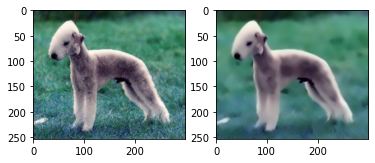

time: 837 ms (started: 2022-03-04 17:33:20 +00:00)


In [ ]:
import numpy as np 
import cv2 
from matplotlib import pyplot as plt 

#

img = cv2.imread('drive/MyDrive/NoteBook/Test_Train_Val/train/n02093647_768.jpg')
dst = cv2.fastNlMeansDenoisingColored(img, None, 15, 15, 7, 15) 
  
plt.subplot(121), plt.imshow(img) 
plt.subplot(122), plt.imshow(dst) 
  
plt.show() 

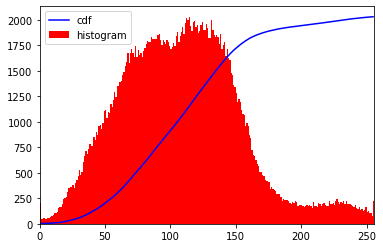

time: 1.1 s (started: 2022-03-04 17:33:51 +00:00)


In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img_ = cv2.imread('drive/MyDrive/NoteBook/Test_Train_Val/train/n02093647_768.jpg') 
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img_.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

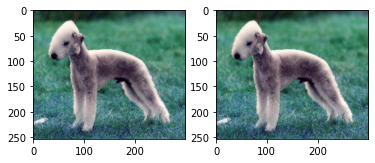

time: 212 ms (started: 2022-03-04 17:33:55 +00:00)


In [ ]:
plt.subplot(121), plt.imshow(img) 
plt.subplot(122), plt.imshow(img_) 
  
plt.show() 

In [ ]:
#Generator

dir_train = "drive/MyDrive/NoteBook/Test_Train_Val/train"
dir_val = "drive/MyDrive/NoteBook/Test_Train_Val/val"
dir_test = "drive/MyDrive/NoteBook/Test_Train_Val/test"

IMAGE_SIZE = (224, 224)

BATCH_SIZE = 128

# use of the pre-processing function
##train_datagen
train_datagen = ImageDataGenerator(rescale=1./255)
##validation_datagen
validation_datagen = ImageDataGenerator(rescale=1./255)
##test_datagen
test_datagen = ImageDataGenerator(rescale=1./255)

##train_generator
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train,
                                                    directory=dir_train,
                                                    x_col='File_name',
                                                    y_col='Category',
                                                    target_size=IMAGE_SIZE,
                                                    class_mode='categorical',
                                                    batch_size=BATCH_SIZE)
#validation_generator
validation_generator = validation_datagen.flow_from_dataframe(dataframe=df_val,
                                                              directory=dir_val,
                                                              x_col="File_name",
                                                              y_col="Category",
                                                              target_size=IMAGE_SIZE,
                                                              class_mode="categorical",
                                                              batch_size=BATCH_SIZE)
#test_generator
test_generator = test_datagen.flow_from_dataframe(dataframe=df_test,
                                                  directory=dir_test,
                                                  x_col="File_name",
                                                  y_col="Category",
                                                  target_size=IMAGE_SIZE,
                                                  class_mode="categorical",
                                                  batch_size=BATCH_SIZE)

Found 7802 validated image filenames belonging to 114 classes.
Found 7023 validated image filenames belonging to 114 classes.
Found 4682 validated image filenames belonging to 114 classes.
time: 6.67 s (started: 2022-02-28 14:45:05 +00:00)


# 1 - My Model 

Found 7802 validated image filenames belonging to 114 classes.
Found 7023 validated image filenames belonging to 114 classes.
Found 4682 validated image filenames belonging to 114 classes.
Epoch 1/5
60/60 [==============================] - 159s 3s/step - loss: 4.7363 - accuracy: 0.0111 - val_loss: 4.7338 - val_accuracy: 0.0095
Epoch 2/5
60/60 [==============================] - 124s 2s/step - loss: 4.7306 - accuracy: 0.0130 - val_loss: 4.7302 - val_accuracy: 0.0100
Epoch 3/5
60/60 [==============================] - 114s 2s/step - loss: 4.7140 - accuracy: 0.0155 - val_loss: 4.7066 - val_accuracy: 0.0139
Epoch 4/5
60/60 [==============================] - 119s 2s/step - loss: 4.6601 - accuracy: 0.0193 - val_loss: 4.6497 - val_accuracy: 0.0187
Epoch 5/5
60/60 [==============================] - 118s 2s/step - loss: 4.6126 - accuracy: 0.0251 - val_loss: 4.6227 - val_accuracy: 0.0203


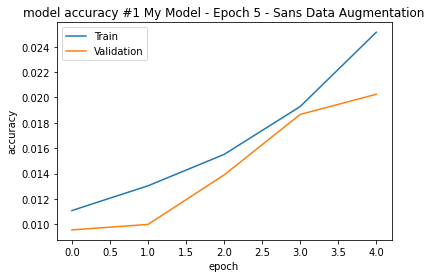

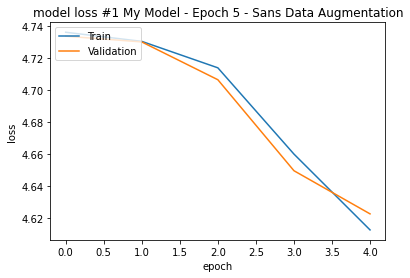

time: 11min 49s (started: 2022-03-05 16:00:47 +00:00)


In [ ]:
#My Model V1 - Epoch 5 - Sans Data Augmentation


#Generator

dir_train = "drive/MyDrive/NoteBook/Test_Train_Val/train"
dir_val = "drive/MyDrive/NoteBook/Test_Train_Val/val"
dir_test = "drive/MyDrive/NoteBook/Test_Train_Val/test"

IMAGE_SIZE = (224, 224)

BATCH_SIZE = 128

# use of the pre-processing function
##train_datagen
train_datagen = ImageDataGenerator(rescale=1./255)
##validation_datagen
validation_datagen = ImageDataGenerator(rescale=1./255)
##test_datagen
test_datagen = ImageDataGenerator(rescale=1./255)

##train_generator
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train,
                                                    directory=dir_train,
                                                    x_col='File_name',
                                                    y_col='Category',
                                                    target_size=IMAGE_SIZE,
                                                    class_mode='categorical',
                                                    batch_size=BATCH_SIZE)
#validation_generator
validation_generator = validation_datagen.flow_from_dataframe(dataframe=df_val,
                                                              directory=dir_val,
                                                              x_col="File_name",
                                                              y_col="Category",
                                                              target_size=IMAGE_SIZE,
                                                              class_mode="categorical",
                                                              batch_size=BATCH_SIZE)
#test_generator
test_generator = test_datagen.flow_from_dataframe(dataframe=df_test,
                                                  directory=dir_test,
                                                  x_col="File_name",
                                                  y_col="Category",
                                                  target_size=IMAGE_SIZE,
                                                  class_mode="categorical",
                                                  batch_size=BATCH_SIZE)


my_model = Sequential()
my_model.add(Conv2D(64,(3, 3), input_shape=(224,224,3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(GlobalAveragePooling2D())
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(units=114,activation='softmax'))
my_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

# summarize
#print(my_model.summary())
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=5)]

# Go
my_history = my_model.fit(train_generator,
                          epochs=5,
                    steps_per_epoch=df_train.shape[0]//BATCH_SIZE,
                    validation_data=validation_generator,
                    validation_steps=df_val.shape[0]//BATCH_SIZE,
                    callbacks=[my_callbacks])

History_graph(my_history, ' #1 My Model - Epoch 5 - Sans Data Augmentation')

#loss: 4.6670 - accuracy: 0.0211 - val_loss: 4.7358 - val_accuracy: 0.0119

Found 7802 validated image filenames belonging to 114 classes.
Found 7023 validated image filenames belonging to 114 classes.
Found 4682 validated image filenames belonging to 114 classes.
Epoch 1/5
60/60 [==============================] - 216s 4s/step - loss: 4.7366 - accuracy: 0.0108 - val_loss: 4.7335 - val_accuracy: 0.0117
Epoch 2/5
60/60 [==============================] - 213s 4s/step - loss: 4.7309 - accuracy: 0.0139 - val_loss: 4.7323 - val_accuracy: 0.0119
Epoch 3/5
60/60 [==============================] - 219s 4s/step - loss: 4.7289 - accuracy: 0.0145 - val_loss: 4.7348 - val_accuracy: 0.0122
Epoch 4/5
60/60 [==============================] - 216s 4s/step - loss: 4.7203 - accuracy: 0.0162 - val_loss: 4.7103 - val_accuracy: 0.0136
Epoch 5/5
60/60 [==============================] - 214s 4s/step - loss: 4.6872 - accuracy: 0.0175 - val_loss: 4.7144 - val_accuracy: 0.0156


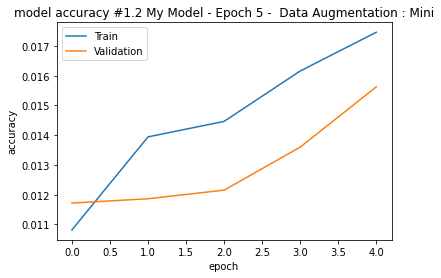

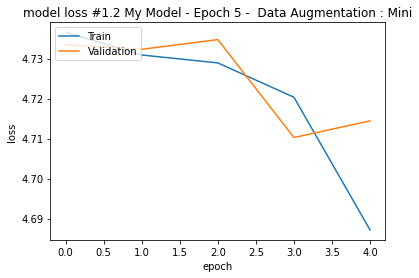

time: 21min 59s (started: 2022-03-05 16:12:38 +00:00)


In [ ]:
#My Model V2 - Epoch 5 - Data Augmentation Mini


#Generator

dir_train = "drive/MyDrive/NoteBook/Test_Train_Val/train"
dir_val = "drive/MyDrive/NoteBook/Test_Train_Val/val"
dir_test = "drive/MyDrive/NoteBook/Test_Train_Val/test"

IMAGE_SIZE = (224, 224)

BATCH_SIZE = 128

# use of the pre-processing function
##train_datagen
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   width_shift_range=0.05,
                                   height_shift_range=0.05,
                                   shear_range=0.05,
                                   zoom_range=0.05,
                                   channel_shift_range=1,
                                   horizontal_flip=True,
                                   brightness_range=[0.1, 1],
                                   fill_mode='nearest')
##validation_datagen
validation_datagen = ImageDataGenerator(rescale=1./255)
##test_datagen
test_datagen = ImageDataGenerator(rescale=1./255)

##train_generator
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train,
                                                    directory=dir_train,
                                                    x_col='File_name',
                                                    y_col='Category',
                                                    target_size=IMAGE_SIZE,
                                                    class_mode='categorical',
                                                    batch_size=BATCH_SIZE)
#validation_generator
validation_generator = validation_datagen.flow_from_dataframe(dataframe=df_val,
                                                              directory=dir_val,
                                                              x_col="File_name",
                                                              y_col="Category",
                                                              target_size=IMAGE_SIZE,
                                                              class_mode="categorical",
                                                              batch_size=BATCH_SIZE)
#test_generator
test_generator = test_datagen.flow_from_dataframe(dataframe=df_test,
                                                  directory=dir_test,
                                                  x_col="File_name",
                                                  y_col="Category",
                                                  target_size=IMAGE_SIZE,
                                                  class_mode="categorical",
                                                  batch_size=BATCH_SIZE)


my_model = Sequential()
my_model.add(Conv2D(64,(3, 3), input_shape=(224,224,3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(GlobalAveragePooling2D())
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(units=114,activation='softmax'))
my_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

# summarize
#print(my_model.summary())
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=5)]

# Go
my_history = my_model.fit(train_generator,
                          epochs=5,
                    steps_per_epoch=df_train.shape[0]//BATCH_SIZE,
                    validation_data=validation_generator,
                    validation_steps=df_val.shape[0]//BATCH_SIZE,
                    callbacks=[my_callbacks])

History_graph(my_history, ' #1.2 My Model - Epoch 5 -  Data Augmentation : Mini')

#loss: 4.6670 - accuracy: 0.0211 - val_loss: 4.7358 - val_accuracy: 0.0119

Found 7802 validated image filenames belonging to 114 classes.
Found 7023 validated image filenames belonging to 114 classes.
Found 4682 validated image filenames belonging to 114 classes.
Epoch 1/5
60/60 [==============================] - 216s 4s/step - loss: 4.7360 - accuracy: 0.0096 - val_loss: 4.7328 - val_accuracy: 0.0097
Epoch 2/5
60/60 [==============================] - 222s 4s/step - loss: 4.7314 - accuracy: 0.0141 - val_loss: 4.7323 - val_accuracy: 0.0122
Epoch 3/5
60/60 [==============================] - 217s 4s/step - loss: 4.7174 - accuracy: 0.0142 - val_loss: 4.7036 - val_accuracy: 0.0142
Epoch 4/5
60/60 [==============================] - 211s 4s/step - loss: 4.6821 - accuracy: 0.0176 - val_loss: 4.6720 - val_accuracy: 0.0155
Epoch 5/5
60/60 [==============================] - 211s 4s/step - loss: 4.6484 - accuracy: 0.0192 - val_loss: 4.6450 - val_accuracy: 0.0158


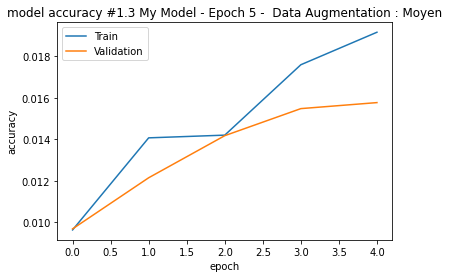

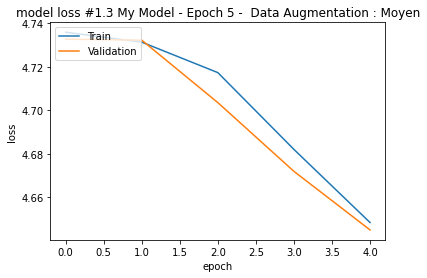

time: 20min 23s (started: 2022-03-05 16:34:37 +00:00)


In [ ]:
#My Model V3 - Epoch 5 - Data Augmentation Moyen


#Generator

dir_train = "drive/MyDrive/NoteBook/Test_Train_Val/train"
dir_val = "drive/MyDrive/NoteBook/Test_Train_Val/val"
dir_test = "drive/MyDrive/NoteBook/Test_Train_Val/test"

IMAGE_SIZE = (224, 224)

BATCH_SIZE = 128

# use of the pre-processing function
##train_datagen
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   channel_shift_range=10,
                                   horizontal_flip=True,
                                   brightness_range=[0.5, 1.5],
                                   fill_mode='nearest')
##validation_datagen
validation_datagen = ImageDataGenerator(rescale=1./255)
##test_datagen
test_datagen = ImageDataGenerator(rescale=1./255)

##train_generator
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train,
                                                    directory=dir_train,
                                                    x_col='File_name',
                                                    y_col='Category',
                                                    target_size=IMAGE_SIZE,
                                                    class_mode='categorical',
                                                    batch_size=BATCH_SIZE)
#validation_generator
validation_generator = validation_datagen.flow_from_dataframe(dataframe=df_val,
                                                              directory=dir_val,
                                                              x_col="File_name",
                                                              y_col="Category",
                                                              target_size=IMAGE_SIZE,
                                                              class_mode="categorical",
                                                              batch_size=BATCH_SIZE)
#test_generator
test_generator = test_datagen.flow_from_dataframe(dataframe=df_test,
                                                  directory=dir_test,
                                                  x_col="File_name",
                                                  y_col="Category",
                                                  target_size=IMAGE_SIZE,
                                                  class_mode="categorical",
                                                  batch_size=BATCH_SIZE)


my_model = Sequential()
my_model.add(Conv2D(64,(3, 3), input_shape=(224,224,3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(GlobalAveragePooling2D())
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(units=114,activation='softmax'))
my_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

# summarize
#print(my_model.summary())
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=5)]

# Go
my_history = my_model.fit(train_generator,
                          epochs=5,
                    steps_per_epoch=df_train.shape[0]//BATCH_SIZE,
                    validation_data=validation_generator,
                    validation_steps=df_val.shape[0]//BATCH_SIZE,
                    callbacks=[my_callbacks])

History_graph(my_history, ' #1.3 My Model - Epoch 5 -  Data Augmentation : Moyen')

#loss: 4.6670 - accuracy: 0.0211 - val_loss: 4.7358 - val_accuracy: 0.0119

Found 7802 validated image filenames belonging to 114 classes.
Found 7023 validated image filenames belonging to 114 classes.
Found 4682 validated image filenames belonging to 114 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/5
60/60 [==============================] - 124s 2s/step - loss: 5.8566 - accuracy: 0.0090 - val_loss: 4.7354 - val_accuracy: 0.0123
Epoch 2/5
60/60 [==============================] - 112s 2s/step - loss: 4.7325 - accuracy: 0.0125 - val_loss: 4.7345 - val_accuracy: 0.0120
Epoch 3/5
60/60 [==============================] - 113s 2s/step - loss: 4.7253 - accuracy: 0.0145 - val_loss: 4.7334 - val_accuracy: 0.0120
Epoch 4/5
60/60 [==============================] - 112s 2s/step - loss: 4.6960 - accuracy: 0.0175 - val_loss: 4.7402 - val_accuracy: 0.0123
Epoch 5/5
60/60 [==============================] - 152s 3s/step - loss: 4.6480 - accuracy: 0.0210 - val_loss: 4.7869 - val_accuracy: 0.0117


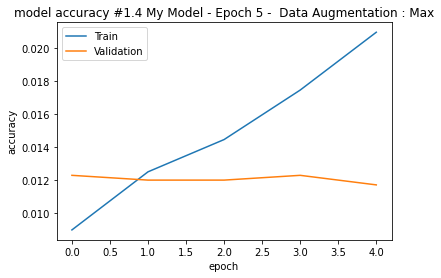

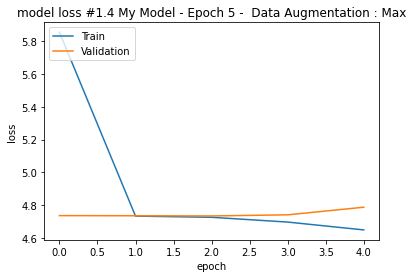

time: 11min 38s (started: 2022-03-05 16:55:00 +00:00)


In [ ]:
#My Model V3 - Epoch 5 - Data Augmentation Max


#Generator

dir_train = "drive/MyDrive/NoteBook/Test_Train_Val/train"
dir_val = "drive/MyDrive/NoteBook/Test_Train_Val/val"
dir_test = "drive/MyDrive/NoteBook/Test_Train_Val/test"

IMAGE_SIZE = (224, 224)

BATCH_SIZE = 128

# use of the pre-processing function
##train_datagen
train_datagen = ImageDataGenerator(ImageDataGenerator(rescale=1./255,
                                   rotation_range=90,
                                   width_shift_range=0.8,
                                   height_shift_range=0.8,
                                   shear_range=0.8,
                                   zoom_range=0.8,
                                   channel_shift_range=10,
                                   horizontal_flip=True,
                                   brightness_range=[1, 3],
                                   fill_mode='nearest'))
##validation_datagen
validation_datagen = ImageDataGenerator(rescale=1./255)
##test_datagen
test_datagen = ImageDataGenerator(rescale=1./255)

##train_generator
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train,
                                                    directory=dir_train,
                                                    x_col='File_name',
                                                    y_col='Category',
                                                    target_size=IMAGE_SIZE,
                                                    class_mode='categorical',
                                                    batch_size=BATCH_SIZE)
#validation_generator
validation_generator = validation_datagen.flow_from_dataframe(dataframe=df_val,
                                                              directory=dir_val,
                                                              x_col="File_name",
                                                              y_col="Category",
                                                              target_size=IMAGE_SIZE,
                                                              class_mode="categorical",
                                                              batch_size=BATCH_SIZE)
#test_generator
test_generator = test_datagen.flow_from_dataframe(dataframe=df_test,
                                                  directory=dir_test,
                                                  x_col="File_name",
                                                  y_col="Category",
                                                  target_size=IMAGE_SIZE,
                                                  class_mode="categorical",
                                                  batch_size=BATCH_SIZE)


my_model = Sequential()
my_model.add(Conv2D(64,(3, 3), input_shape=(224,224,3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(GlobalAveragePooling2D())
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(units=114,activation='softmax'))
my_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

# summarize
#print(my_model.summary())
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=5)]

# Go
my_history = my_model.fit(train_generator,
                          epochs=5,
                    steps_per_epoch=df_train.shape[0]//BATCH_SIZE,
                    validation_data=validation_generator,
                    validation_steps=df_val.shape[0]//BATCH_SIZE,
                    callbacks=[my_callbacks])

History_graph(my_history, ' #1.4 My Model - Epoch 5 -  Data Augmentation : Max')

#loss: 4.6670 - accuracy: 0.0211 - val_loss: 4.7358 - val_accuracy: 0.0119

In [ ]:
# Best Model Epoch 20

Found 7802 validated image filenames belonging to 114 classes.
Found 7023 validated image filenames belonging to 114 classes.
Found 4682 validated image filenames belonging to 114 classes.
Epoch 1/5
60/60 [==============================] - 118s 2s/step - loss: 4.7358 - accuracy: 0.0107 - val_loss: 4.7325 - val_accuracy: 0.0122 - lr: 0.0010
Epoch 2/5
60/60 [==============================] - 112s 2s/step - loss: 4.7264 - accuracy: 0.0151 - val_loss: 4.7145 - val_accuracy: 0.0139 - lr: 0.0010
Epoch 3/5
60/60 [==============================] - 113s 2s/step - loss: 4.6939 - accuracy: 0.0167 - val_loss: 4.6911 - val_accuracy: 0.0133 - lr: 0.0010
Epoch 4/5
60/60 [==============================] - 113s 2s/step - loss: 4.6544 - accuracy: 0.0163 - val_loss: 4.6504 - val_accuracy: 0.0165 - lr: 0.0010
Epoch 5/5
60/60 [==============================] - 157s 3s/step - loss: 4.6259 - accuracy: 0.0193 - val_loss: 4.6397 - val_accuracy: 0.0149 - lr: 0.0010


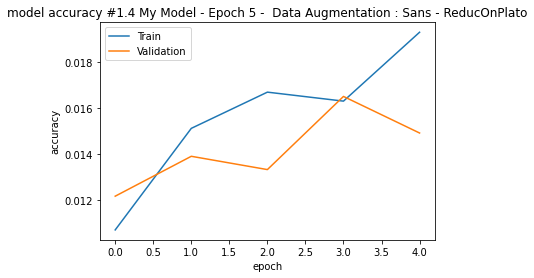

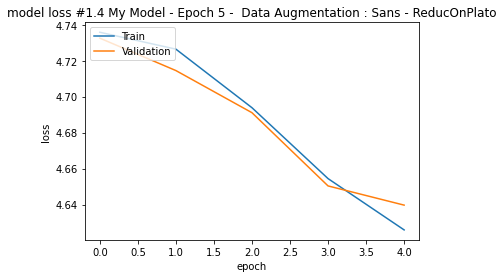

time: 12min 56s (started: 2022-03-05 17:07:34 +00:00)


In [ ]:
#My Model V4 - Epoch 5 - Sans Data Augmentation - Reduc On Plato - Epoch 5


#Generator

dir_train = "drive/MyDrive/NoteBook/Test_Train_Val/train"
dir_val = "drive/MyDrive/NoteBook/Test_Train_Val/val"
dir_test = "drive/MyDrive/NoteBook/Test_Train_Val/test"

IMAGE_SIZE = (224, 224)

BATCH_SIZE = 128

# use of the pre-processing function
##train_datagen
train_datagen = ImageDataGenerator(rescale=1./255)
##validation_datagen
validation_datagen = ImageDataGenerator(rescale=1./255)
##test_datagen
test_datagen = ImageDataGenerator(rescale=1./255)

##train_generator
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train,
                                                    directory=dir_train,
                                                    x_col='File_name',
                                                    y_col='Category',
                                                    target_size=IMAGE_SIZE,
                                                    class_mode='categorical',
                                                    batch_size=BATCH_SIZE)
#validation_generator
validation_generator = validation_datagen.flow_from_dataframe(dataframe=df_val,
                                                              directory=dir_val,
                                                              x_col="File_name",
                                                              y_col="Category",
                                                              target_size=IMAGE_SIZE,
                                                              class_mode="categorical",
                                                              batch_size=BATCH_SIZE)
#test_generator
test_generator = test_datagen.flow_from_dataframe(dataframe=df_test,
                                                  directory=dir_test,
                                                  x_col="File_name",
                                                  y_col="Category",
                                                  target_size=IMAGE_SIZE,
                                                  class_mode="categorical",
                                                  batch_size=BATCH_SIZE)


my_model = Sequential()
my_model.add(Conv2D(64,(3, 3), input_shape=(224,224,3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(GlobalAveragePooling2D())
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(units=114,activation='softmax'))
my_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

# summarize
#print(my_model.summary())
my_callbacks = [ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.001)]

# Go
my_history = my_model.fit(train_generator,
                          epochs=5,
                    steps_per_epoch=df_train.shape[0]//BATCH_SIZE,
                    validation_data=validation_generator,
                    validation_steps=df_val.shape[0]//BATCH_SIZE,
                    callbacks=[my_callbacks])

History_graph(my_history, ' #1.5 My Model - Epoch 5 -  Data Augmentation : Sans - ReducOnPlato')


Found 7802 validated image filenames belonging to 114 classes.
Found 7023 validated image filenames belonging to 114 classes.
Found 4682 validated image filenames belonging to 114 classes.
Epoch 1/5
60/60 [==============================] - 115s 2s/step - loss: 634.1364 - accuracy: 0.0115 - val_loss: 4.7329 - val_accuracy: 0.0095
Epoch 2/5
60/60 [==============================] - 113s 2s/step - loss: 4.7900 - accuracy: 0.0130 - val_loss: 4.7869 - val_accuracy: 0.0124
Epoch 3/5
60/60 [==============================] - 112s 2s/step - loss: 4.7315 - accuracy: 0.0139 - val_loss: 4.7375 - val_accuracy: 0.0123
Epoch 4/5
60/60 [==============================] - 113s 2s/step - loss: 4.8264 - accuracy: 0.0128 - val_loss: 4.7351 - val_accuracy: 0.0095
Epoch 5/5
60/60 [==============================] - 129s 2s/step - loss: 4.7641 - accuracy: 0.0130 - val_loss: 4.7334 - val_accuracy: 0.0100


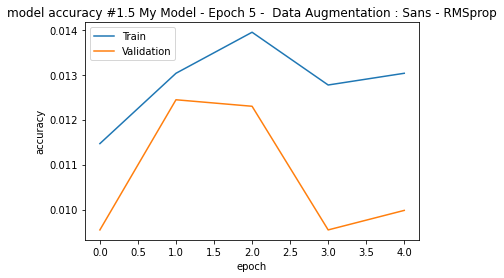

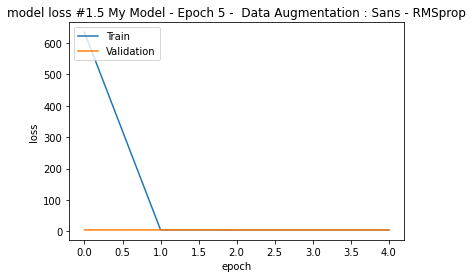

time: 10min 46s (started: 2022-03-05 17:21:06 +00:00)


In [ ]:
#optimiseur - Epoch 5

#My Model V4 - Epoch 5 - Sans Data Augmentation - Reduc On Plato - Epoch 5


#Generator

dir_train = "drive/MyDrive/NoteBook/Test_Train_Val/train"
dir_val = "drive/MyDrive/NoteBook/Test_Train_Val/val"
dir_test = "drive/MyDrive/NoteBook/Test_Train_Val/test"

IMAGE_SIZE = (224, 224)

BATCH_SIZE = 128

# use of the pre-processing function
##train_datagen
train_datagen = ImageDataGenerator(rescale=1./255)
##validation_datagen
validation_datagen = ImageDataGenerator(rescale=1./255)
##test_datagen
test_datagen = ImageDataGenerator(rescale=1./255)

##train_generator
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train,
                                                    directory=dir_train,
                                                    x_col='File_name',
                                                    y_col='Category',
                                                    target_size=IMAGE_SIZE,
                                                    class_mode='categorical',
                                                    batch_size=BATCH_SIZE)
#validation_generator
validation_generator = validation_datagen.flow_from_dataframe(dataframe=df_val,
                                                              directory=dir_val,
                                                              x_col="File_name",
                                                              y_col="Category",
                                                              target_size=IMAGE_SIZE,
                                                              class_mode="categorical",
                                                              batch_size=BATCH_SIZE)
#test_generator
test_generator = test_datagen.flow_from_dataframe(dataframe=df_test,
                                                  directory=dir_test,
                                                  x_col="File_name",
                                                  y_col="Category",
                                                  target_size=IMAGE_SIZE,
                                                  class_mode="categorical",
                                                  batch_size=BATCH_SIZE)

optimiseur = tf.keras.optimizers.RMSprop(learning_rate=0.01)

my_model = Sequential()
my_model.add(Conv2D(64,(3, 3), input_shape=(224,224,3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(GlobalAveragePooling2D())
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(units=114,activation='softmax'))
my_model.compile(optimizer=optimiseur, loss='categorical_crossentropy', metrics = ['accuracy'])

# summarize
#print(my_model.summary())
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=5)]

# Go
my_history = my_model.fit(train_generator,
                          epochs=5,
                    steps_per_epoch=df_train.shape[0]//BATCH_SIZE,
                    validation_data=validation_generator,
                    validation_steps=df_val.shape[0]//BATCH_SIZE,
                    callbacks=[my_callbacks])

History_graph(my_history, ' #1.5 My Model - Epoch 5 -  Data Augmentation : Sans - RMSprop')





Epoch 1/20
60/60 [==============================] - 135s 2s/step - loss: 4.7361 - accuracy: 0.0100 - val_loss: 4.7328 - val_accuracy: 0.0103
Epoch 2/20
60/60 [==============================] - 117s 2s/step - loss: 4.7257 - accuracy: 0.0121 - val_loss: 4.7120 - val_accuracy: 0.0120
Epoch 3/20
60/60 [==============================] - 116s 2s/step - loss: 4.6883 - accuracy: 0.0167 - val_loss: 4.6724 - val_accuracy: 0.0136
Epoch 4/20
60/60 [==============================] - 115s 2s/step - loss: 4.6495 - accuracy: 0.0173 - val_loss: 4.6451 - val_accuracy: 0.0161
Epoch 5/20
60/60 [==============================] - 116s 2s/step - loss: 4.6107 - accuracy: 0.0210 - val_loss: 4.6129 - val_accuracy: 0.0198
Epoch 6/20
60/60 [==============================] - 116s 2s/step - loss: 4.5595 - accuracy: 0.0242 - val_loss: 4.5545 - val_accuracy: 0.0207
Epoch 7/20
60/60 [==============================] - 116s 2s/step - loss: 4.4941 - accuracy: 0.0300 - val_loss: 4.5248 - val_accuracy: 0.0285
Epoch 8/20
60

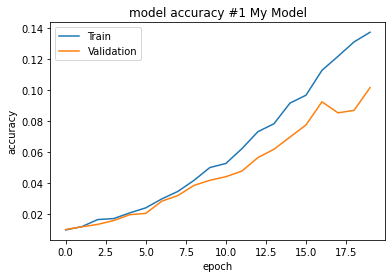

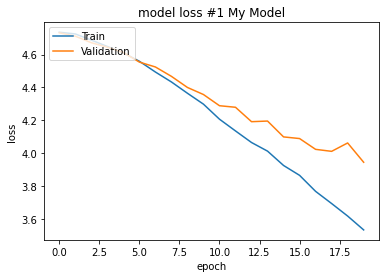

time: 43min 41s (started: 2022-02-28 14:45:19 +00:00)


In [ ]:
#My Model V1 - Epoch 20 - Sans Data Augmentation
my_model = Sequential()
my_model.add(Conv2D(64,(3, 3), input_shape=(224,224,3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(GlobalAveragePooling2D())
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(units=114,activation='softmax'))
my_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

# summarize
#print(my_model.summary())
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=5)]

# Go
my_history = my_model.fit(train_generator,
                          epochs=20,
                    steps_per_epoch=df_train.shape[0]//BATCH_SIZE,
                    validation_data=validation_generator,
                    validation_steps=df_val.shape[0]//BATCH_SIZE,
                    callbacks=[my_callbacks])

History_graph(my_history, ' #1 My Model')

#loss: 4.6670 - accuracy: 0.0211 - val_loss: 4.7358 - val_accuracy: 0.0119

Found 7802 validated image filenames belonging to 114 classes.
Found 7023 validated image filenames belonging to 114 classes.
Found 4682 validated image filenames belonging to 114 classes.
Epoch 1/50
60/60 [==============================] - 122s 2s/step - loss: 4.7362 - accuracy: 0.0106 - val_loss: 4.7335 - val_accuracy: 0.0123
Epoch 2/50
60/60 [==============================] - 117s 2s/step - loss: 4.7308 - accuracy: 0.0112 - val_loss: 4.7331 - val_accuracy: 0.0120
Epoch 3/50
60/60 [==============================] - 114s 2s/step - loss: 4.7286 - accuracy: 0.0139 - val_loss: 4.7294 - val_accuracy: 0.0136
Epoch 4/50
60/60 [==============================] - 114s 2s/step - loss: 4.7082 - accuracy: 0.0151 - val_loss: 4.6946 - val_accuracy: 0.0140
Epoch 5/50
60/60 [==============================] - 114s 2s/step - loss: 4.6631 - accuracy: 0.0165 - val_loss: 4.6648 - val_accuracy: 0.0188
Epoch 6/50
60/60 [==============================] - 113s 2s/step - loss: 4.6127 - accuracy: 0.0207 - val_l

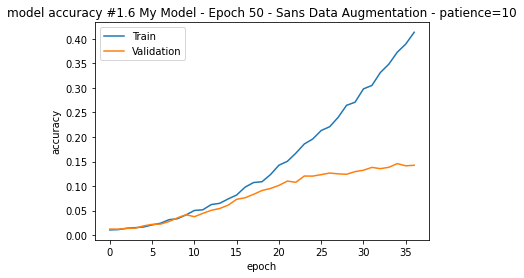

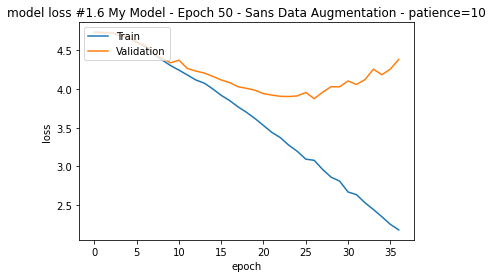

time: 1h 19min 12s (started: 2022-03-05 17:32:36 +00:00)


In [ ]:
#My Model V1 - Epoch 5 - Sans Data Augmentation

BATCH_SIZE = 128

#Generator

dir_train = "drive/MyDrive/NoteBook/Test_Train_Val/train"
dir_val = "drive/MyDrive/NoteBook/Test_Train_Val/val"
dir_test = "drive/MyDrive/NoteBook/Test_Train_Val/test"

IMAGE_SIZE = (224, 224)

BATCH_SIZE = 128

# use of the pre-processing function
##train_datagen
train_datagen = ImageDataGenerator(rescale=1./255)
##validation_datagen
validation_datagen = ImageDataGenerator(rescale=1./255)
##test_datagen
test_datagen = ImageDataGenerator(rescale=1./255)

##train_generator
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train,
                                                    directory=dir_train,
                                                    x_col='File_name',
                                                    y_col='Category',
                                                    target_size=IMAGE_SIZE,
                                                    class_mode='categorical',
                                                    batch_size=BATCH_SIZE)
#validation_generator
validation_generator = validation_datagen.flow_from_dataframe(dataframe=df_val,
                                                              directory=dir_val,
                                                              x_col="File_name",
                                                              y_col="Category",
                                                              target_size=IMAGE_SIZE,
                                                              class_mode="categorical",
                                                              batch_size=BATCH_SIZE)
#test_generator
test_generator = test_datagen.flow_from_dataframe(dataframe=df_test,
                                                  directory=dir_test,
                                                  x_col="File_name",
                                                  y_col="Category",
                                                  target_size=IMAGE_SIZE,
                                                  class_mode="categorical",
                                                  batch_size=BATCH_SIZE)


my_model = Sequential()
my_model.add(Conv2D(64,(3, 3), input_shape=(224,224,3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(GlobalAveragePooling2D())
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(units=114,activation='softmax'))
my_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

# summarize
#print(my_model.summary())
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=10)]

# Go
my_history = my_model.fit(train_generator,
                          epochs=50,
                    steps_per_epoch=df_train.shape[0]//BATCH_SIZE,
                    validation_data=validation_generator,
                    validation_steps=df_val.shape[0]//BATCH_SIZE,
                    callbacks=[my_callbacks])

History_graph(my_history, ' #1.6 My Model - Epoch 50 - Sans Data Augmentation - patience=10')

#loss: 4.6670 - accuracy: 0.0211 - val_loss: 4.7358 - val_accuracy: 0.0119

Found 7802 validated image filenames belonging to 114 classes.
Found 7023 validated image filenames belonging to 114 classes.
Found 4682 validated image filenames belonging to 114 classes.
Epoch 1/5
60/60 [==============================] - 151s 3s/step - loss: 4.7356 - accuracy: 0.0120 - val_loss: 4.7341 - val_accuracy: 0.0095
Epoch 2/5
60/60 [==============================] - 113s 2s/step - loss: 4.7309 - accuracy: 0.0128 - val_loss: 4.7322 - val_accuracy: 0.0122
Epoch 3/5
60/60 [==============================] - 113s 2s/step - loss: 4.7286 - accuracy: 0.0141 - val_loss: 4.7324 - val_accuracy: 0.0120
Epoch 4/5
60/60 [==============================] - 113s 2s/step - loss: 4.7277 - accuracy: 0.0139 - val_loss: 4.7358 - val_accuracy: 0.0123
Epoch 5/5
60/60 [==============================] - 113s 2s/step - loss: 4.7276 - accuracy: 0.0142 - val_loss: 4.7323 - val_accuracy: 0.0123


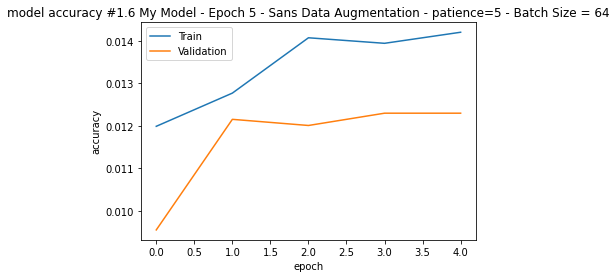

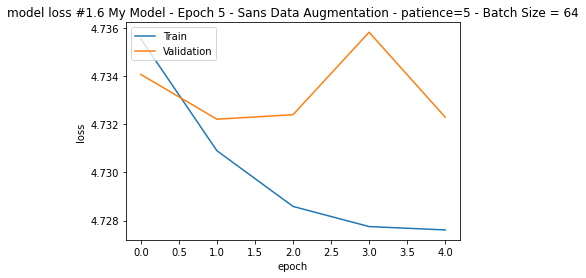

time: 10min 38s (started: 2022-03-05 19:15:42 +00:00)


In [ ]:
#My Model V1 - Epoch 5 - Sans Data Augmentation

BATCH_SIZE = 64

#Generator

dir_train = "drive/MyDrive/NoteBook/Test_Train_Val/train"
dir_val = "drive/MyDrive/NoteBook/Test_Train_Val/val"
dir_test = "drive/MyDrive/NoteBook/Test_Train_Val/test"

IMAGE_SIZE = (224, 224)

BATCH_SIZE = 128

# use of the pre-processing function
##train_datagen
train_datagen = ImageDataGenerator(rescale=1./255)
##validation_datagen
validation_datagen = ImageDataGenerator(rescale=1./255)
##test_datagen
test_datagen = ImageDataGenerator(rescale=1./255)

##train_generator
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train,
                                                    directory=dir_train,
                                                    x_col='File_name',
                                                    y_col='Category',
                                                    target_size=IMAGE_SIZE,
                                                    class_mode='categorical',
                                                    batch_size=BATCH_SIZE)
#validation_generator
validation_generator = validation_datagen.flow_from_dataframe(dataframe=df_val,
                                                              directory=dir_val,
                                                              x_col="File_name",
                                                              y_col="Category",
                                                              target_size=IMAGE_SIZE,
                                                              class_mode="categorical",
                                                              batch_size=BATCH_SIZE)
#test_generator
test_generator = test_datagen.flow_from_dataframe(dataframe=df_test,
                                                  directory=dir_test,
                                                  x_col="File_name",
                                                  y_col="Category",
                                                  target_size=IMAGE_SIZE,
                                                  class_mode="categorical",
                                                  batch_size=BATCH_SIZE)


my_model = Sequential()
my_model.add(Conv2D(64,(3, 3), input_shape=(224,224,3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(GlobalAveragePooling2D())
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(units=114,activation='softmax'))
my_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

# summarize
#print(my_model.summary())
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=5)]

# Go
my_history = my_model.fit(train_generator,
                          epochs=5,
                    steps_per_epoch=df_train.shape[0]//BATCH_SIZE,
                    validation_data=validation_generator,
                    validation_steps=df_val.shape[0]//BATCH_SIZE,
                    callbacks=[my_callbacks])

History_graph(my_history, ' #1.6 My Model - Epoch 5 - Sans Data Augmentation - patience=5 - Batch Size = 64')

#loss: 4.6670 - accuracy: 0.0211 - val_loss: 4.7358 - val_accuracy: 0.0119

Found 7802 validated image filenames belonging to 114 classes.
Found 7023 validated image filenames belonging to 114 classes.
Found 4682 validated image filenames belonging to 114 classes.
Epoch 1/5
60/60 [==============================] - 116s 2s/step - loss: 4.7364 - accuracy: 0.0111 - val_loss: 4.7335 - val_accuracy: 0.0095
Epoch 2/5
60/60 [==============================] - 152s 3s/step - loss: 4.7317 - accuracy: 0.0137 - val_loss: 4.7326 - val_accuracy: 0.0122
Epoch 3/5
60/60 [==============================] - 114s 2s/step - loss: 4.7294 - accuracy: 0.0142 - val_loss: 4.7323 - val_accuracy: 0.0123
Epoch 4/5
60/60 [==============================] - 114s 2s/step - loss: 4.7274 - accuracy: 0.0134 - val_loss: 4.7336 - val_accuracy: 0.0123
Epoch 5/5
60/60 [==============================] - 114s 2s/step - loss: 4.7275 - accuracy: 0.0142 - val_loss: 4.7322 - val_accuracy: 0.0120


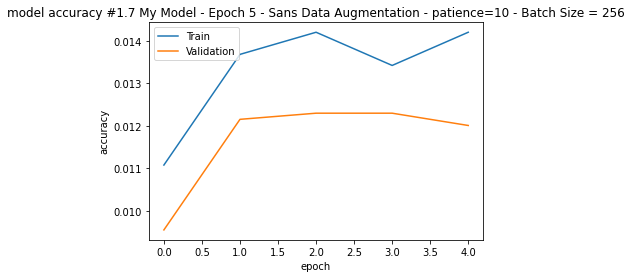

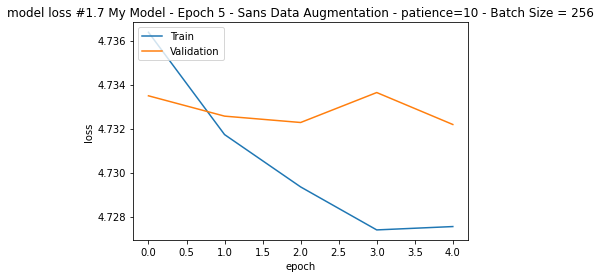

time: 12min 6s (started: 2022-03-05 19:31:09 +00:00)


In [ ]:
#My Model V1 - Epoch 5 - Sans Data Augmentation

BATCH_SIZE = 256

#Generator

dir_train = "drive/MyDrive/NoteBook/Test_Train_Val/train"
dir_val = "drive/MyDrive/NoteBook/Test_Train_Val/val"
dir_test = "drive/MyDrive/NoteBook/Test_Train_Val/test"

IMAGE_SIZE = (224, 224)

BATCH_SIZE = 128

# use of the pre-processing function
##train_datagen
train_datagen = ImageDataGenerator(rescale=1./255)
##validation_datagen
validation_datagen = ImageDataGenerator(rescale=1./255)
##test_datagen
test_datagen = ImageDataGenerator(rescale=1./255)

##train_generator
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train,
                                                    directory=dir_train,
                                                    x_col='File_name',
                                                    y_col='Category',
                                                    target_size=IMAGE_SIZE,
                                                    class_mode='categorical',
                                                    batch_size=BATCH_SIZE)
#validation_generator
validation_generator = validation_datagen.flow_from_dataframe(dataframe=df_val,
                                                              directory=dir_val,
                                                              x_col="File_name",
                                                              y_col="Category",
                                                              target_size=IMAGE_SIZE,
                                                              class_mode="categorical",
                                                              batch_size=BATCH_SIZE)
#test_generator
test_generator = test_datagen.flow_from_dataframe(dataframe=df_test,
                                                  directory=dir_test,
                                                  x_col="File_name",
                                                  y_col="Category",
                                                  target_size=IMAGE_SIZE,
                                                  class_mode="categorical",
                                                  batch_size=BATCH_SIZE)


my_model = Sequential()
my_model.add(Conv2D(64,(3, 3), input_shape=(224,224,3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(GlobalAveragePooling2D())
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(units=114,activation='softmax'))
my_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

# summarize
#print(my_model.summary())
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=10)]

# Go
my_history = my_model.fit(train_generator,
                          epochs=5,
                    steps_per_epoch=df_train.shape[0]//BATCH_SIZE,
                    validation_data=validation_generator,
                    validation_steps=df_val.shape[0]//BATCH_SIZE,
                    callbacks=[my_callbacks])

History_graph(my_history, ' #1.7 My Model - Epoch 5 - Sans Data Augmentation - patience=10 - Batch Size = 256')

#loss: 4.6670 - accuracy: 0.0211 - val_loss: 4.7358 - val_accuracy: 0.0119

my_model

# 2 - Transfer Learning

# 2.1 - Transfer Learning - VGG 16 

VGG16

# 2.2 - Transfer Learning - VGG19

80150528/80134624 [==============================] - 1s 0us/step
Epoch 1/20
60/60 [==============================] - 209s 3s/step - loss: 4.7220 - accuracy: 0.0194 - val_loss: 4.6347 - val_accuracy: 0.0284
Epoch 2/20
60/60 [==============================] - 180s 3s/step - loss: 4.4548 - accuracy: 0.0444 - val_loss: 4.2789 - val_accuracy: 0.0472
Epoch 3/20
60/60 [==============================] - 180s 3s/step - loss: 4.0853 - accuracy: 0.0758 - val_loss: 3.9299 - val_accuracy: 0.0907
Epoch 4/20
60/60 [==============================] - 180s 3s/step - loss: 3.7552 - accuracy: 0.1196 - val_loss: 3.7298 - val_accuracy: 0.1149
Epoch 5/20
60/60 [==============================] - 180s 3s/step - loss: 3.5231 - accuracy: 0.1547 - val_loss: 3.6026 - val_accuracy: 0.1380
Epoch 6/20
60/60 [==============================] - 180s 3s/step - loss: 3.3468 - accuracy: 0.1800 - val_loss: 3.4760 - val_accuracy: 0.1544
Epoch 7/20
60/60 [==============================] - 180s 3s/step - loss: 3.2097 - accurac

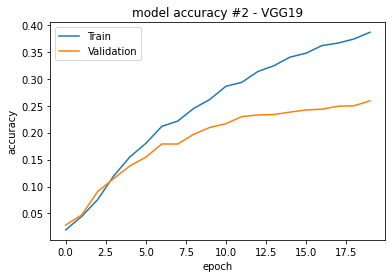

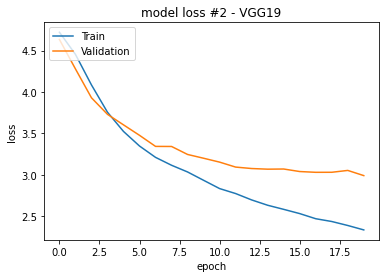

time: 1h 3min 5s (started: 2022-02-28 15:33:44 +00:00)


In [ ]:
# Load model
VGG19Model =  tf.keras.applications.VGG19(weights='imagenet', include_top=False)

# freeze convolutional layers
for layer in VGG19Model.layers:
  layer.trainable = False

# add new classifier output layer
x = GlobalAveragePooling2D()(VGG19Model.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output = Dense(114, activation = 'softmax')(x)

# Define new model
model_vgg19 = Model(inputs = VGG19Model.inputs, outputs = output)

model_vgg19.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

history_Vgg19 = model_vgg19.fit(train_generator,
                    epochs=20,
                    steps_per_epoch=df_train.shape[0]//BATCH_SIZE,
                    validation_data=validation_generator,
                    validation_steps=df_val.shape[0]//BATCH_SIZE,
                    callbacks=[my_callbacks])



History_graph(history_Vgg19, ' #2 - VGG19')

In [ ]:
#VGG19

# 2.3 - Transfer Learning - InceptionV3

In [ ]:
from keras.applications.inception_v3 import InceptionV3

# load model
model_IncV3 = InceptionV3(include_top=False, input_shape=(224, 224, 3))

# add new classifier layers
flat1 = Flatten()(model_IncV3.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(114, activation='softmax')(class1)

# define new model
model_IncV3 = Model(inputs=model_IncV3.inputs, outputs=output)

#Hide
for layer in model_IncV3.layers:
  layer.trainable = False

#Compil
model_IncV3.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])


#Go
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)]


history_IncV3 = model_IncV3.fit(train_generator,
                    epochs=20,
                    steps_per_epoch=df_train.shape[0]//BATCH_SIZE,
                    validation_data=validation_generator,
                    validation_steps=df_val.shape[0]//BATCH_SIZE,
                    callbacks=[my_callbacks])

History_graph(history_IncV3, ' #3 - inception v3')

Inception v3

# 2.4 - Transfer Learning - InceptionResNetV2

In [ ]:
# Load model
IRNV2 =  tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False)

# freeze convolutional layers
for layer in IRNV2.layers:
  layer.trainable = False

# add new classifier output layer
x = GlobalAveragePooling2D()(IRNV2.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output = Dense(114, activation = 'softmax')(x)

my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)]

# Define new model
model_NetV2 = Model(inputs = IRNV2.inputs, outputs = output)

model_NetV2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

history_NetV2 = model_NetV2.fit(train_generator,
                    epochs=20,
                    steps_per_epoch=df_train.shape[0]//BATCH_SIZE,
                    validation_data=validation_generator,
                    validation_steps=df_val.shape[0]//BATCH_SIZE,
                    callbacks=[my_callbacks])

History_graph(history_NetV2, ' #4 InceptionResNetV2')

ResNet v2

# 2.5 - Transfer Learning - XceptionModel

83697664/83683744 [==============================] - 1s 0us/step
Epoch 1/20
60/60 [==============================] - 177s 3s/step - loss: 1.4507 - accuracy: 0.6482 - val_loss: 0.8251 - val_accuracy: 0.7635
Epoch 2/20
60/60 [==============================] - 158s 3s/step - loss: 0.6067 - accuracy: 0.8182 - val_loss: 0.8405 - val_accuracy: 0.7633
Epoch 3/20
60/60 [==============================] - 158s 3s/step - loss: 0.4269 - accuracy: 0.8642 - val_loss: 0.8158 - val_accuracy: 0.7720
Epoch 4/20
60/60 [==============================] - 158s 3s/step - loss: 0.3172 - accuracy: 0.8977 - val_loss: 0.8643 - val_accuracy: 0.7678
Epoch 5/20
60/60 [==============================] - 158s 3s/step - loss: 0.2303 - accuracy: 0.9240 - val_loss: 0.8751 - val_accuracy: 0.7714
Epoch 6/20
60/60 [==============================] - 158s 3s/step - loss: 0.1629 - accuracy: 0.9466 - val_loss: 0.9074 - val_accuracy: 0.7765
Epoch 7/20
60/60 [==============================] - 158s 3s/step - loss: 0.1167 - accurac

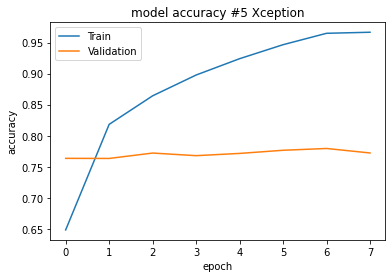

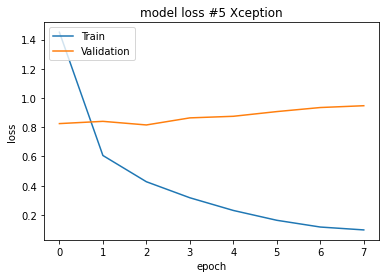

time: 25min 33s (started: 2022-02-28 16:37:32 +00:00)


In [ ]:

XceptionModel = tf.keras.applications.Xception(weights='imagenet', include_top=False)

# freeze convolutional layers
for layer in XceptionModel.layers:
    layer.trainable = False

# add new classifier output layer
x = GlobalAveragePooling2D()(XceptionModel.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output = Dense(114, activation='softmax')(x)

# Define new model
model_Xcept = Model(inputs=XceptionModel.inputs, outputs=output)

model_Xcept.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['accuracy'])

history_model_Xcept = model_Xcept.fit(train_generator,
                    epochs=20,
                    steps_per_epoch=df_train.shape[0]//BATCH_SIZE,
                    validation_data=validation_generator,
                    validation_steps=df_val.shape[0]//BATCH_SIZE,
                    callbacks=[my_callbacks])

History_graph(history_model_Xcept, ' #5 Xception')

In [ ]:
stop()

In [ ]:
# DATA AUGMENTATION TEST

# -----> GO AVEC DATA AUGMENTATiON

In [ ]:
# -----> GO

# Reglage Zero


# use of the pre-processing function
##train_datagen
train_datagen = ImageDataGenerator(rescale=1./255)
##validation_datagen
validation_datagen = ImageDataGenerator(rescale=1./255)
##test_datagen
test_datagen = ImageDataGenerator(rescale=1./255)

##train_generator
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train,
                                                    directory=dir_train,
                                                    x_col='File_name',
                                                    y_col='Category',
                                                    target_size=IMAGE_SIZE,
                                                    class_mode='categorical',
                                                    batch_size=BATCH_SIZE)
#validation_generator
validation_generator = validation_datagen.flow_from_dataframe(dataframe=df_val,
                                                              directory=dir_val,
                                                              x_col="File_name",
                                                              y_col="Category",
                                                              target_size=IMAGE_SIZE,
                                                              class_mode="categorical",
                                                              batch_size=BATCH_SIZE)
#test_generator
test_generator = test_datagen.flow_from_dataframe(dataframe=df_test,
                                                  directory=dir_test,
                                                  x_col="File_name",
                                                  y_col="Category",
                                                  target_size=IMAGE_SIZE,
                                                  class_mode="categorical",
                                                  batch_size=BATCH_SIZE)



# Load model
IRNV2 =  tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False)

# freeze convolutional layers
for layer in IRNV2.layers:
  layer.trainable = False

# add new classifier output layer
x = GlobalAveragePooling2D()(IRNV2.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output = Dense(114, activation = 'softmax')(x)

my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)]

# Define new model
model_NetV2 = Model(inputs = IRNV2.inputs, outputs = output)

model_NetV2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

history_Def_0 = model_NetV2.fit(train_generator,
                    epochs=5,
                    steps_per_epoch=df_train.shape[0]//BATCH_SIZE,
                    validation_data=validation_generator,
                    validation_steps=df_val.shape[0]//BATCH_SIZE,
                    callbacks=[my_callbacks])


History_graph(history_Def_0, ' #6 InceptionResNetV2 Data Augmentation : Sans')

In [ ]:
# Reglage Mini



train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   width_shift_range=0.05,
                                   height_shift_range=0.05,
                                   shear_range=0.05,
                                   zoom_range=0.05,
                                   channel_shift_range=1,
                                   horizontal_flip=True,
                                   brightness_range=[0.1, 1],
                                   fill_mode='nearest')


##train_generator
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train,
                                                    directory=dir_train,
                                                    x_col='File_name',
                                                    y_col='Category',
                                                    target_size=IMAGE_SIZE,
                                                    class_mode='categorical',
                                                    batch_size=BATCH_SIZE)
#validation_generator
validation_generator = validation_datagen.flow_from_dataframe(dataframe=df_val,
                                                              directory=dir_val,
                                                              x_col="File_name",
                                                              y_col="Category",
                                                              target_size=IMAGE_SIZE,
                                                              class_mode="categorical",
                                                              batch_size=BATCH_SIZE)
#test_generator
test_generator = test_datagen.flow_from_dataframe(dataframe=df_test,
                                                  directory=dir_test,
                                                  x_col="File_name",
                                                  y_col="Category",
                                                  target_size=IMAGE_SIZE,
                                                  class_mode="categorical",
                                                  batch_size=BATCH_SIZE)



# Load model
IRNV2 =  tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False)

# freeze convolutional layers
for layer in IRNV2.layers:
  layer.trainable = False

# add new classifier output layer
x = GlobalAveragePooling2D()(IRNV2.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output = Dense(114, activation = 'softmax')(x)

my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)]

# Define new model
model_NetV2 = Model(inputs = IRNV2.inputs, outputs = output)

model_NetV2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

history_Def_0 = model_NetV2.fit(train_generator,
                    epochs=5,
                    steps_per_epoch=df_train.shape[0]//BATCH_SIZE,
                    validation_data=validation_generator,
                    validation_steps=df_val.shape[0]//BATCH_SIZE,
                    callbacks=[my_callbacks])

History_graph(model_Def_v0, ' #7 InceptionResNetV2 Data Augmentation : Mini')

In [ ]:
# Reglage Moyen

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   channel_shift_range=10,
                                   horizontal_flip=True,
                                   brightness_range=[0.5, 1.5],
                                   fill_mode='nearest')

##train_generator
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train,
                                                    directory=dir_train,
                                                    x_col='File_name',
                                                    y_col='Category',
                                                    target_size=IMAGE_SIZE,
                                                    class_mode='categorical',
                                                    batch_size=BATCH_SIZE)
#validation_generator
validation_generator = validation_datagen.flow_from_dataframe(dataframe=df_val,
                                                              directory=dir_val,
                                                              x_col="File_name",
                                                              y_col="Category",
                                                              target_size=IMAGE_SIZE,
                                                              class_mode="categorical",
                                                              batch_size=BATCH_SIZE)
#test_generator
test_generator = test_datagen.flow_from_dataframe(dataframe=df_test,
                                                  directory=dir_test,
                                                  x_col="File_name",
                                                  y_col="Category",
                                                  target_size=IMAGE_SIZE,
                                                  class_mode="categorical",
                                                  batch_size=BATCH_SIZE)



# Load model
IRNV2 =  tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False)

# freeze convolutional layers
for layer in IRNV2.layers:
  layer.trainable = False

# add new classifier output layer
x = GlobalAveragePooling2D()(IRNV2.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output = Dense(114, activation = 'softmax')(x)

my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)]

# Define new model
model_NetV2 = Model(inputs = IRNV2.inputs, outputs = output)

model_NetV2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

history_Def_0 = model_NetV2.fit(train_generator,
                    epochs=5,
                    steps_per_epoch=df_train.shape[0]//BATCH_SIZE,
                    validation_data=validation_generator,
                    validation_steps=df_val.shape[0]//BATCH_SIZE,
                    callbacks=[my_callbacks])


History_graph(model_Def_v0 , ' #8 InceptionResNetV2 Data Augmentation : Moyen')

In [ ]:
# Reglage Max

train_datagen = ImageDataGenerator(ImageDataGenerator(rescale=1./255,
                                   rotation_range=90,
                                   width_shift_range=0.8,
                                   height_shift_range=0.8,
                                   shear_range=0.8,
                                   zoom_range=0.8,
                                   channel_shift_range=10,
                                   horizontal_flip=True,
                                   brightness_range=[1, 3],
                                   fill_mode='nearest'))


##train_generator
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train,
                                                    directory=dir_train,
                                                    x_col='File_name',
                                                    y_col='Category',
                                                    target_size=IMAGE_SIZE,
                                                    class_mode='categorical',
                                                    batch_size=BATCH_SIZE)
#validation_generator
validation_generator = validation_datagen.flow_from_dataframe(dataframe=df_val,
                                                              directory=dir_val,
                                                              x_col="File_name",
                                                              y_col="Category",
                                                              target_size=IMAGE_SIZE,
                                                              class_mode="categorical",
                                                              batch_size=BATCH_SIZE)
#test_generator
test_generator = test_datagen.flow_from_dataframe(dataframe=df_test,
                                                  directory=dir_test,
                                                  x_col="File_name",
                                                  y_col="Category",
                                                  target_size=IMAGE_SIZE,
                                                  class_mode="categorical",
                                                  batch_size=BATCH_SIZE)



# Load model
IRNV2 =  tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False)

# freeze convolutional layers
for layer in IRNV2.layers:
  layer.trainable = False

# add new classifier output layer
x = GlobalAveragePooling2D()(IRNV2.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output = Dense(114, activation = 'softmax')(x)

my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)]

# Define new model
model_NetV2 = Model(inputs = IRNV2.inputs, outputs = output)

model_NetV2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

history_Def_0 = model_NetV2.fit(train_generator,
                    epochs=5,
                    steps_per_epoch=df_train.shape[0]//BATCH_SIZE,
                    validation_data=validation_generator,
                    validation_steps=df_val.shape[0]//BATCH_SIZE,
                    callbacks=[my_callbacks])

History_graph(model_Def_v0, ' #9 - InceptionResNetV2 Data Augmentation : Max')

# -----> GO AVEC REGLAGE DIFFERENT

In [ ]:
# Determiner le best 

In [ ]:
# Avec Epoch 20 

In [ ]:
# Avec Patience 5

In [ ]:
# Avec Patience 10

In [ ]:
# Avec ReduceOnPlato

In [ ]:
# Je prends le best 

#my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=5)]

#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.001)



In [ ]:
import pandas as pd
 
# initialize list of lists
data = [['My Model', 2], ['VGG16 ', 7], ['VGG19', 12],['Xception', 77], ['InceptionResNetV2', 82], ['InceptionV3', 3]]
df = pd.DataFrame(data, columns = ['Model', 'Accuracy_Score'])
df = df.sort_values(by=['Accuracy_Score'])
df

import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Model", y="Accuracy_Score", data=df)


In [ ]:
ax = sns.barplot(x="Accuracy_Score", y="Model", data=df)

Best Model


In [ ]:
# Best model 1
IRNV2 =  tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False)

# freeze convolutional layers
for layer in IRNV2.layers:
  layer.trainable = False

# add new classifier output layer
x = GlobalAveragePooling2D()(IRNV2.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output = Dense(114, activation = 'softmax')(x)

# Define new model

model_Def_v1 = Model(inputs = IRNV2.inputs, outputs = output)
model_Def_v1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])
model_Def_v1 = model_Def_v1.fit(train_generator,
                    epochs=20,
                    steps_per_epoch=df_train.shape[0]//BATCH_SIZE,
                    validation_data=validation_generator,
                    validation_steps=df_val.shape[0]//BATCH_SIZE,
                    callbacks=[my_callbacks])

History_graph(model_Def_v1, ' InceptionResNetV2 - Patience 5 ')

In [ ]:
# Best model 2
IRNV2 =  tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False)

# freeze convolutional layers
for layer in IRNV2.layers:
  layer.trainable = False

# add new classifier output layer
x = GlobalAveragePooling2D()(IRNV2.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output = Dense(114, activation = 'softmax', name="predictions")(x)

# Define new model
model_Def_v2 = Model(inputs = IRNV2.inputs, outputs = output)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.001)

model_Def_v2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

history_Def_v2 = model_Def_v2.fit(train_generator,
                    epochs=20,
                    steps_per_epoch=df_train.shape[0]//BATCH_SIZE,
                    validation_data=validation_generator,
                    validation_steps=df_val.shape[0]//BATCH_SIZE,
                    callbacks=reduce_lr)

History_graph(history_Def_v2, ' InceptionResNetV2 - ReduceLROnPlateau')

In [ ]:
# Best Model + LAyer test 

In [ ]:
stop()

In [ ]:
model_Def_v2.save("drive/MyDrive/NoteBook/Test_Train_Val/model_Def_best.h5")
print("Saved model to disk")

In [ ]:
# Best model 3
IRNV2 =  tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False)

# freeze convolutional layers
for layer in IRNV2.layers:
  layer.trainable = False

# add new classifier output layer
x = GlobalAveragePooling2D()(IRNV2.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output = Dense(114, activation = 'softmax', name="predictions")(x)

# Define new model
model_Def_v3 = Model(inputs = IRNV2.inputs, outputs = output)

#Optimiz Test
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

#callbacks Test
initial_learning_rate = 0.01
epochs = 30
decay = initial_learning_rate / epochs
def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.001)

model_Def_v3.compile( optimizer=sgd, loss='categorical_crossentropy', metrics = ['accuracy'])

history_Def_v3 = model_Def_v3.fit(train_generator,
                    epochs=20,
                    steps_per_epoch=df_train.shape[0]//BATCH_SIZE,
                    validation_data=validation_generator,
                    validation_steps=df_val.shape[0]//BATCH_SIZE,
                    callbacks=tf.keras.callbacks.LearningRateScheduler(lr_time_based_decay))

History_graph(history_Def_v3)

In [ ]:
def History_graph_V2(histo, string):
  plt.plot(histo.history['accuracy'])'
  plt.plot(histo.history['val_accuracy'])
  plt.title('model accuracy' + string)
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.figure(figsize=(10,10))
  plt.show()
  print('')
  # summarize history for loss
  plt.plot(histo.history['loss'])
  plt.plot(histo.history['val_loss'])
  plt.title('model loss'+ string)
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.figure(figsize=(10,10))
  plt.show()

In [ ]:
#Best Model 

# Load model
IRNV2 =  tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False)

# freeze convolutional layers
for layer in IRNV2.layers:
  layer.trainable = False

# add new classifier output layer
x = GlobalAveragePooling2D()(IRNV2.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output = Dense(114, activation = 'softmax', name="predictions")(x)

# Define new model
model_Def = Model(inputs = IRNV2.inputs, outputs = output)

optimiseur = tf.keras.optimizers.RMSprop(learning_rate=0.01)

my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=10)]

model_Def.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

history_Def = model_Def.fit(train_generator,
                    epochs=20,
                    steps_per_epoch=df_train.shape[0]//128,
                    validation_data=validation_generator,
                    validation_steps=df_val.shape[0]//128,
                    callbacks=[my_callbacks])


History_graph(history_Def)

In [ ]:
from tqdm import tqdm

image_location = 'drive/MyDrive/NoteBook/Test_Train_Val/test'

file_list=os.listdir(image_location)  # list of files

lst_pred = []

#Lst Class
class_df = pd.DataFrame(test_generator.class_indices,  index=[0])
class_df_T = class_df.T
class_df_T = class_df_T.reset_index()
class_df_T = class_df_T.rename(columns={0: "ref_idx", "index": "race"})

for f in tqdm(file_list): # iterate through the files in the directory list
    try:
      f_path=os.path.join(image_location, f)  # create the path to the image file
      img=cv2.imread(f_path)    # read in the image - note cv2 reads in images in BGR format
      img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # model was trained on RGB images so convert to RGB
      img=cv2.resize(img, (128,128)) # model was trained on images of size 128  X 128 X 3 so resize the images
      img=img/255 # model was trained with pixel value scalled between -1 to +1 so convert the pixel range    
      img=np.expand_dims(img, axis=0) # model predict expects the input to have dimension (batch_size, width, height, bands)
      prediction =model_Def.predict (img, batch_size=1, verbose=0) # make predictions    
      pred=np.argmax(prediction)# find the index of the column with the highest probability
      pred_1 = str(class_df_T.loc[class_df_T['ref_idx'] == pred]["race"][pred])
      #print ('for file ', f_path, '/ Predicted ---> ', pred_1 , ' / Idx ---> ' , pred, ' / Proba----> ', prediction[0][pred]  )
      lst_pred.append([f_path, pred_1, pred,prediction[0][pred] ])
      #print('--')
    except:
      continue

In [ ]:
lst_pred_df = pd.DataFrame(lst_pred)
lst_pred_df[0] = lst_pred_df[0].astype('string')
lst_pred_df = lst_pred_df.rename(columns={0: "path", 1:"Cat_prob",2: "Idx", 3:"Proba"})

lst_pred_df[['C0', 'C1','C2','C3','C4', 'File_name']] = lst_pred_df['path'].str.split('/', expand=True)
lst_pred_df.pop('C0')
lst_pred_df.pop('C1')
lst_pred_df.pop('C2')
lst_pred_df.pop('C3')
lst_pred_df.pop('C4')


lst_pred_df

In [ ]:
df_test_for_comp = df_test[['File_name', 'Category']]

reunion_df1 = lst_pred_df[['Cat_prob', 'Proba', 'File_name']]

reunion_df2 = df_test_for_comp.copy()

result = pd.merge(reunion_df1, reunion_df2, on="File_name")



In [ ]:
df_test_for_comp = df_test[['File_name', 'Category']]
df_test_for_comp

In [ ]:
reunion_df1 = lst_pred_df[['Cat_prob', 'Proba', 'File_name']]

reunion_df2 = df_test_for_comp.copy()

In [ ]:
result = pd.merge(reunion_df1, reunion_df2, on="File_name")
result

In [ ]:
target = test_generator.class_indices
target_df = pd.DataFrame.from_dict(target, orient='index')
target_df_T = target_df.T
target_df_T_col = target_df_T.columns
list_race = target_df_T_col.values

def Thresold_finder(x, result, list_race):
  print(" --- THRESHOLD : ", x , "---")
  print("")
  resultxx = result.copy()
  print("df Before : " , resultxx.shape)
  resultxx = resultxx[resultxx.Proba > x]
  print("df After : ", resultxx.shape)
  print("")
  y_true = resultxx.Cat_prob
  y_pred = resultxx.Category
  print ( 'Acc Général : ' , accuracy_score(y_true, y_pred))
  print("")
  print(classification_report(y_true, y_pred, target_names=list_race))
  print("")
  cf_matrix = confusion_matrix(y_true, y_pred)
  fig, ax = plt.subplots(figsize=(30,30)) 
  sns.heatmap(cf_matrix, annot=False,  ax=ax)

In [ ]:
Thresold_finder(0.99, result, list_race)

In [ ]:
df_test
df_test.to_csv('drive/MyDrive/NoteBook/Test_Train_Val/df_test.csv', index=False)

In [ ]:
class_df = pd.DataFrame(test_generator.class_indices,  index=[0])
class_df_T = class_df.T
class_df_T = class_df_T.reset_index()
class_df_T = class_df_T.rename(columns={0: "ref_idx", "index": "race"})

class_df_T.to_csv('drive/MyDrive/NoteBook/Test_Train_Val/class_df_T.csv', index=False)

In [ ]:
# BEST MODEL 

In [ ]:
# Avec Epoch 20 - Patience 5 - DataGenerator MINI

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   width_shift_range=0.05,
                                   height_shift_range=0.05,
                                   shear_range=0.05,
                                   zoom_range=0.05,
                                   channel_shift_range=1,
                                   horizontal_flip=True,
                                   brightness_range=[0.1, 1],
                                   fill_mode='nearest')


##validation_datagen
validation_datagen = ImageDataGenerator(rescale=1./255)
##test_datagen
test_datagen = ImageDataGenerator(rescale=1./255)

##train_generator
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train,
                                                    directory=dir_train,
                                                    x_col='File_name',
                                                    y_col='Category',
                                                    target_size=IMAGE_SIZE,
                                                    class_mode='categorical',
                                                    batch_size=BATCH_SIZE)
#validation_generator
validation_generator = validation_datagen.flow_from_dataframe(dataframe=df_val,
                                                              directory=dir_val,
                                                              x_col="File_name",
                                                              y_col="Category",
                                                              target_size=IMAGE_SIZE,
                                                              class_mode="categorical",
                                                              batch_size=BATCH_SIZE)
#test_generator
test_generator = test_datagen.flow_from_dataframe(dataframe=df_test,
                                                  directory=dir_test,
                                                  x_col="File_name",
                                                  y_col="Category",
                                                  target_size=IMAGE_SIZE,
                                                  class_mode="categorical",
                                                  batch_size=BATCH_SIZE)



# Load model
IRNV2 =  tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False)

# freeze convolutional layers
for layer in IRNV2.layers:
  layer.trainable = False

# add new classifier output layer
x = GlobalAveragePooling2D()(IRNV2.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output = Dense(114, activation = 'softmax')(x)

my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=5)]

# Define new model
model_NetV2 = Model(inputs = IRNV2.inputs, outputs = output)

model_NetV2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

history_Def_0 = model_NetV2.fit(train_generator,
                    epochs=6,
                    steps_per_epoch=df_train.shape[0]//BATCH_SIZE,
                    validation_data=validation_generator,
                    validation_steps=df_val.shape[0]//BATCH_SIZE,
                    callbacks=[my_callbacks])


History_graph(history_Def_0, ' #15 InceptionResNetV2 - Best Model')

In [ ]:
model_NetV2.save("drive/MyDrive/NoteBook/Test_Train_Val/model_Def_best_2102.h5")
print("Saved model to disk")

In [ ]:
#My Model V1 - Epoch 5 - Sans Data Augmentation

BATCH_SIZE = 128

#Generator

dir_train = "drive/MyDrive/NoteBook/Test_Train_Val/train"
dir_val = "drive/MyDrive/NoteBook/Test_Train_Val/val"
dir_test = "drive/MyDrive/NoteBook/Test_Train_Val/test"

IMAGE_SIZE = (224, 224)

BATCH_SIZE = 128

# use of the pre-processing function
##train_datagen
train_datagen = ImageDataGenerator(rescale=1./255)
##validation_datagen
validation_datagen = ImageDataGenerator(rescale=1./255)
##test_datagen
test_datagen = ImageDataGenerator(rescale=1./255)

##train_generator
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train,
                                                    directory=dir_train,
                                                    x_col='File_name',
                                                    y_col='Category',
                                                    target_size=IMAGE_SIZE,
                                                    class_mode='categorical',
                                                    batch_size=BATCH_SIZE)
#validation_generator
validation_generator = validation_datagen.flow_from_dataframe(dataframe=df_val,
                                                              directory=dir_val,
                                                              x_col="File_name",
                                                              y_col="Category",
                                                              target_size=IMAGE_SIZE,
                                                              class_mode="categorical",
                                                              batch_size=BATCH_SIZE)
#test_generator
test_generator = test_datagen.flow_from_dataframe(dataframe=df_test,
                                                  directory=dir_test,
                                                  x_col="File_name",
                                                  y_col="Category",
                                                  target_size=IMAGE_SIZE,
                                                  class_mode="categorical",
                                                  batch_size=BATCH_SIZE)


my_model = Sequential()
my_model.add(Conv2D(64,(3, 3), input_shape=(224,224,3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(GlobalAveragePooling2D())
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(units=114,activation='softmax'))
my_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])


#Optimiz Test
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

#callbacks Test
initial_learning_rate = 0.01
epochs = 30
decay = initial_learning_rate / epochs
def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.001)

my_model.compile( optimizer=sgd, loss='categorical_crossentropy', metrics = ['accuracy'])

history_Def_v3 = my_model.fit(train_generator,
                    epochs=20,
                    steps_per_epoch=df_train.shape[0]//BATCH_SIZE,
                    validation_data=validation_generator,
                    validation_steps=df_val.shape[0]//BATCH_SIZE,
                    callbacks=tf.keras.callbacks.LearningRateScheduler(lr_time_based_decay))

History_graph(history_Def_v3)

Found 7802 validated image filenames belonging to 114 classes.
Found 7023 validated image filenames belonging to 114 classes.
Found 4682 validated image filenames belonging to 114 classes.
Epoch 1/20
60/60 [==============================] - 119s 2s/step - loss: 4.7367 - accuracy: 0.0082 - val_loss: 4.7360 - val_accuracy: 0.0110 - lr: 0.0100
Epoch 2/20
60/60 [==============================] - 115s 2s/step - loss: 4.7357 - accuracy: 0.0095 - val_loss: 4.7356 - val_accuracy: 0.0116 - lr: 0.0100
Epoch 3/20
60/60 [==============================] - 115s 2s/step - loss: 4.7349 - accuracy: 0.0108 - val_loss: 4.7352 - val_accuracy: 0.0098 - lr: 0.0100
Epoch 4/20
60/60 [==============================] - 114s 2s/step - loss: 4.7343 - accuracy: 0.0111 - val_loss: 4.7349 - val_accuracy: 0.0087 - lr: 0.0100
Epoch 5/20
60/60 [==============================] - 114s 2s/step - loss: 4.7337 - accuracy: 0.0129 - val_loss: 4.7346 - val_accuracy: 0.0122 - lr: 0.0100
Epoch 6/20


KeyboardInterrupt: ignored

time: 11min 6s (started: 2022-03-05 19:52:39 +00:00)


In [ ]:
%load_ext tensorboard

import tensorflow as tf
from tensorboard.plugins.hparams import api as hp

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
time: 39.8 ms (started: 2022-03-05 20:04:49 +00:00)


In [ ]:
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([16, 32]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.2))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

time: 11.2 ms (started: 2022-03-05 20:11:25 +00:00)


In [ ]:
def train_test_model(hparams):
  model = tf.keras.models.Sequential([
  my_model.add(Conv2D(64,(3, 3), input_shape=(224,224,3), padding='same', activation='relu'))
  my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  my_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  my_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  my_model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  my_model.add(GlobalAveragePooling2D())
  my_model.add(Dense(512, activation='relu'))
  my_model.add(Dense(units=114,activation='softmax'))])
  
  my_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

  my_model.compile(optimizer=hparams[HP_OPTIMIZER],loss='categorical_crossentropy',metrics=['accuracy'],)

  my_model.fit(x_train, y_train, epochs=1) # Run with 1 epoch to speed things up for demo purposes
  _, accuracy = my_model.evaluate(x_test, y_test)
  return accuracy

df.to_csv('out.zip', index=False,
          compression=compression_opts)